In [ ]:
#This project created by Tirth Patel, device used was Apple Macbook with m1 chip with 7-core GPU.
#for better performance, it;s recommended to use GPU
#The functionality has been taken from tensroflow.com, skleaarn.com
#https://www.tensorflow.org/api_docs/python/tf

In [1]:
#import essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.utils import np_utils
from keras.models import load_model

Init Plugin
Init Graph Optimizer
Init Kernel


In [2]:
#create dataframe from dataset .csv file
df = pd.read_csv("Dataset.csv").astype('float32')

In [3]:
#print the shapes of dataset
df.head()
df.rename(columns={'0':'label'}, inplace=True)
X = df.drop('label',axis = 1)
y = df['label']
df.head()
print(X.shape)
print(y.shape)


(372450, 784)
(372450,)


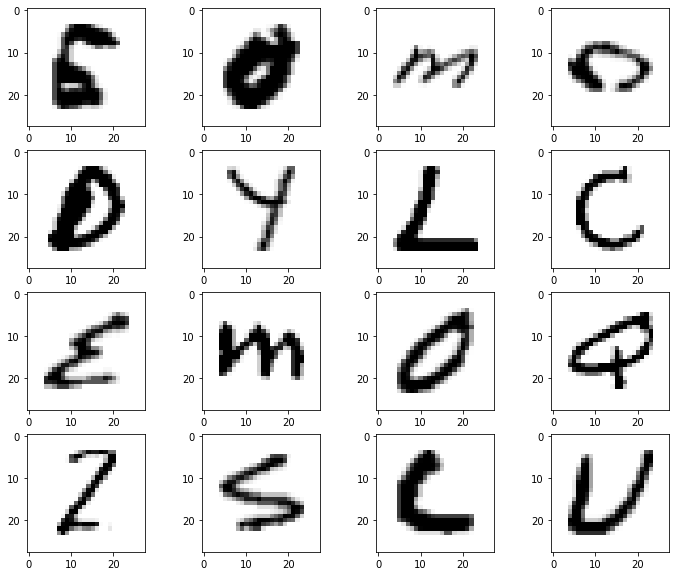

In [4]:
#Visualize the datasets images
from sklearn.utils import shuffle

X_shuffle = shuffle(X)

plt.figure(figsize = (12,10))
row, colums = 4, 4
for i in range(16):  
    plt.subplot(colums, row, i+1)
    plt.imshow(X_shuffle.iloc[i].values.reshape(28,28),interpolation='nearest', cmap='Greys')
plt.show()


In [5]:
#spilt data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

# scale data
standard_scaler = MinMaxScaler()
standard_scaler.fit(X_train)

X_train = standard_scaler.transform(X_train)
X_test = standard_scaler.transform(X_test)

Data after scaler


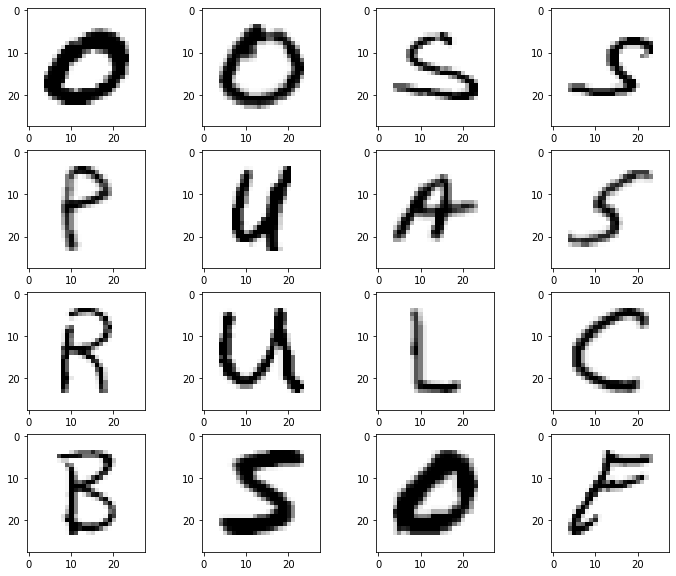

In [6]:
print("Data after scaler")
X_shuffle = shuffle(X_train)

plt.figure(figsize = (12,10))
row, colums = 4, 4
for i in range(16):  
    plt.subplot(colums, row, i+1)
    plt.imshow(X_shuffle[i].reshape(28,28),interpolation='nearest', cmap='Greys')
plt.show()


In [7]:
#reshape the data
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')

y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

In [8]:
#model creation
cls = keras.Sequential()
cls.add(layers.Conv2D(32, (3, 3), input_shape=(28, 28, 1), activation='relu'))
cls.add(layers.MaxPooling2D(pool_size=(2, 2)))
cls.add(layers.Dropout(0.3))
cls.add(layers.Conv2D(32, (3, 3), input_shape=(28, 28, 1), activation='relu'))
cls.add(layers.MaxPooling2D(pool_size=(2, 2)))
cls.add(layers.Dropout(0.3))
cls.add(layers.Flatten())
cls.add(layers.Dense(500, activation="relu", input_dim = X_train.shape[1]))
cls.add(layers.Dense(400, activation="relu"))
cls.add(layers.Dense(300, activation="relu"))
cls.add(layers.Dense(200, activation="relu"))
cls.add(layers.Dense(100, activation="relu"))
cls.add(layers.Dropout(0.5))
cls.add(layers.Dense(len(y.unique()), activation='softmax'))

Metal device set to: Apple M1


2021-12-15 11:56:09.835399: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2021-12-15 11:56:09.835767: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [9]:
#compile the model
from tensorflow.keras.metrics import Precision,Recall
cls.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy', Precision(), Recall()])

In [10]:
cls.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0

In [11]:
# fit the model and print the score of evaluation
history = cls.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=200, verbose=2)

scores = cls.evaluate(X_test,y_test, verbose=1)
print("CNN Score:",scores)

cls.save('model1.h5')


2021-12-15 11:56:30.052550: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2021-12-15 11:56:30.052788: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


Epoch 1/20


2021-12-15 11:56:30.343846: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-12-15 11:56:56.129845: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1304/1304 - 31s - loss: 0.3788 - accuracy: 0.8978 - precision: 0.9506 - recall: 0.8664 - val_loss: 0.0807 - val_accuracy: 0.9782 - val_precision: 0.9819 - val_recall: 0.9756
Epoch 2/20
1304/1304 - 28s - loss: 0.1192 - accuracy: 0.9708 - precision: 0.9772 - recall: 0.9641 - val_loss: 0.0662 - val_accuracy: 0.9819 - val_precision: 0.9855 - val_recall: 0.9790
Epoch 3/20
1304/1304 - 28s - loss: 0.0956 - accuracy: 0.9763 - precision: 0.9813 - recall: 0.9714 - val_loss: 0.0574 - val_accuracy: 0.9849 - val_precision: 0.9871 - val_recall: 0.9830
Epoch 4/20
1304/1304 - 28s - loss: 0.0827 - accuracy: 0.9795 - precision: 0.9837 - recall: 0.9751 - val_loss: 0.0496 - val_accuracy: 0.9869 - val_precision: 0.9891 - val_recall: 0.9854
Epoch 5/20
1304/1304 - 28s - loss: 0.0719 - accuracy: 0.9817 - precision: 0.9855 - recall: 0.9780 - val_loss: 0.0487 - val_accuracy: 0.9877 - val_precision: 0.9896 - val_recall: 0.9867
Epoch 6/20
1304/1304 - 28s - loss: 0.0640 - accuracy: 0.9835 - precision: 0.9870 - rec

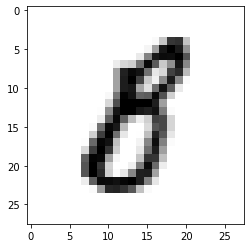

B


In [17]:
# prediction
word_dict = {0:'A',1:'B',2:'C',3:'D',4:'E',5:'F',6:'G',7:'H',8:'I',9:'J',10:'K',11:'L',12:'M',13:'N',14:'O',15:'P',16:'Q',17:'R',18:'S',19:'T',20:'U',21:'V',22:'W',23:'X', 24:'Y',25:'Z'}

img = X_test[235].reshape(28, 28)
img_final =np.reshape(img, (1,28,28,1))

pred = word_dict[np.argmax(cls.predict(img_final))]
plt.imshow(img, cmap='Greys')

plt.show()

print(pred)


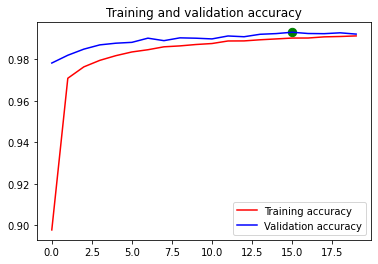

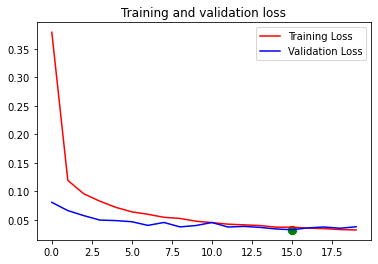

In [13]:
#Plotting accuracy, Loss and  Validation accuracy and validation lose after training
%matplotlib inline
acc = np.array(history.history['accuracy'])
val_acc = np.array(history.history['val_accuracy'])
loss = np.array(history.history['loss'])
val_loss = np.array(history.history['val_loss'])

epochs = np.arange(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.scatter(epochs[val_acc.argmax()], val_acc.max(), color='green', s=70)
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.scatter(epochs[val_loss.argmin()], val_loss.min(), color='green', s=70)
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [18]:
#calculate F1 score for the model
precision = scores[2]
recall = scores[3]
f1_score = (2 * (precision * recall)/(precision+recall))
print(str(f1_score))


0.9922048619891357
